In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
logistic = lambda x: 1/(1+np.exp(-x))

In [36]:
N = 200
x = np.random.uniform(-5,5,size = N)
prob = logistic(-1 + .5 * x)
y = np.random.binomial(1,prob)

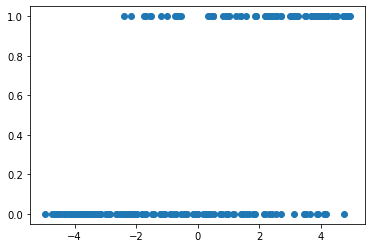

In [37]:
plt.scatter(x,y)

In [38]:
import pymc3 as pm
with pm.Model() as linear_model:
    theta0 = pm.Normal("theta0",mu=0,sigma=10)
    theta1 = pm.Normal("theta1",mu=0,sigma=10)
    prob = pm.Deterministic('prob', 1 / (1 + pm.math.exp(-(theta0+theta1*x))))
    y_observed = pm.Bernoulli('y_observed', prob, observed=y)
    #prior = pm.sample_prior_predictive()
    posterior = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta1, theta0]
100%|██████████| 1000/1000 [00:01<00:00, 772.45it/s]


[-1.18702996 -0.41858025]
[0.41597237 0.6886982 ]


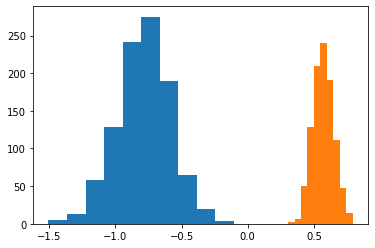

In [39]:
plt.hist(posterior['theta0'])
plt.hist(posterior['theta1'])
print(pm.hpd(posterior,.05)[0]['theta0'])
print(pm.hpd(posterior,.05)[0]['theta1'])
theta0_mean = posterior['theta0'].mean()
theta1_mean = posterior['theta1'].mean()

In [40]:
y_pred = logistic(theta0_mean+theta1_mean*x)>.5
accuracy = (y_pred==y).sum()/N
print(accuracy)
TP = ((y==1)&(y_pred==1)).sum()
TN = ((y==0)&(y_pred==0)).sum()
FP = ((y==0)&(y_pred==1)).sum()
FN = ((y==1)&(y_pred==0)).sum()
print(np.array([[TN,FP],[FN,TP]]))
print(TP/(FN+TP))
P = (y==1).sum()
N = (y==0).sum()
print(P/(P+N))

0.765
[[95 24]
 [23 58]]
0.7160493827160493
0.405
